In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


638

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime


In [9]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | wencheng
Processing Record 5 of Set 1 | aklavik
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | port blair
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | poum
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | opuwo
Processing Record 23 of

Processing Record 39 of Set 4 | bolshevik
Processing Record 40 of Set 4 | dikson
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | madikeri
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | rio gallegos
Processing Record 46 of Set 4 | yumen
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | sungaipenuh
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | san felipe
Processing Record 2 of Set 5 | camacha
Processing Record 3 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | oussouye
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | wakkanai
Processing Record 9 of Set 5 | solnechnyy
Processing Record 10 of Set 5 | kilindoni
Processing Record 11 of Set 5 | kerrv

Processing Record 24 of Set 8 | puerto carreno
Processing Record 25 of Set 8 | aksu
Processing Record 26 of Set 8 | kusa
Processing Record 27 of Set 8 | vondrozo
Processing Record 28 of Set 8 | glendive
Processing Record 29 of Set 8 | chitral
Processing Record 30 of Set 8 | auki
Processing Record 31 of Set 8 | alyangula
Processing Record 32 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 8 | bangkal
Processing Record 34 of Set 8 | sao felix do xingu
Processing Record 35 of Set 8 | koplik
Processing Record 36 of Set 8 | marsa matruh
Processing Record 37 of Set 8 | cantaura
Processing Record 38 of Set 8 | grand centre
City not found. Skipping...
Processing Record 39 of Set 8 | saint-denis
Processing Record 40 of Set 8 | gombe
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | aviles
Processing Record 43 of Set 8 | ranau
Processing Record 44 of Set 8 | kysyl-syr
Processing Record 45 of Set 8 | jaciara


Processing Record 9 of Set 12 | dhandhuka
Processing Record 10 of Set 12 | weihe
Processing Record 11 of Set 12 | tuatapere
Processing Record 12 of Set 12 | tanout
Processing Record 13 of Set 12 | udachnyy
Processing Record 14 of Set 12 | lubango
Processing Record 15 of Set 12 | harper
Processing Record 16 of Set 12 | maceio
Processing Record 17 of Set 12 | garoua
Processing Record 18 of Set 12 | ekhabi
Processing Record 19 of Set 12 | nador
Processing Record 20 of Set 12 | kieta
Processing Record 21 of Set 12 | miri
Processing Record 22 of Set 12 | lasa
Processing Record 23 of Set 12 | liverpool
Processing Record 24 of Set 12 | vagamo
Processing Record 25 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | richards bay
Processing Record 28 of Set 12 | wahran
City not found. Skipping...
Processing Record 29 of Set 12 | lagoa
Processing Record 30 of Set 12 | merauke
Processing Record 31 of Set 12 | yining
Process

In [10]:
len(city_data)

579

In [11]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,69.80,88,20,8.05,ZA,2020-02-21 19:52:22
1,Chuy,-33.70,-53.46,64.53,51,64,18.05,UY,2020-02-21 19:52:23
2,Wencheng,33.06,113.80,41.52,46,0,3.11,CN,2020-02-21 19:52:23
3,Aklavik,68.22,-135.01,3.20,84,90,11.41,CA,2020-02-21 19:52:23
4,Kapaa,22.08,-159.32,75.20,69,40,4.70,US,2020-02-21 19:52:24
5,Port Blair,11.67,92.75,81.43,76,0,16.15,IN,2020-02-21 19:52:24
6,Rikitea,-23.12,-134.97,78.96,61,49,6.20,PF,2020-02-21 19:52:24
7,Punta Arenas,-53.15,-70.92,68.00,45,40,25.28,CL,2020-02-21 19:52:24
8,Kodiak,57.79,-152.41,26.60,49,75,21.92,US,2020-02-21 19:52:24
9,Cape Town,-33.93,18.42,70.00,72,16,10.29,ZA,2020-02-21 19:50:06


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2020-02-21 19:52:22,-33.92,25.57,69.80,88,20,8.05
1,Chuy,UY,2020-02-21 19:52:23,-33.70,-53.46,64.53,51,64,18.05
2,Wencheng,CN,2020-02-21 19:52:23,33.06,113.80,41.52,46,0,3.11
3,Aklavik,CA,2020-02-21 19:52:23,68.22,-135.01,3.20,84,90,11.41
4,Kapaa,US,2020-02-21 19:52:24,22.08,-159.32,75.20,69,40,4.70
5,Port Blair,IN,2020-02-21 19:52:24,11.67,92.75,81.43,76,0,16.15
6,Rikitea,PF,2020-02-21 19:52:24,-23.12,-134.97,78.96,61,49,6.20
7,Punta Arenas,CL,2020-02-21 19:52:24,-53.15,-70.92,68.00,45,40,25.28
8,Kodiak,US,2020-02-21 19:52:24,57.79,-152.41,26.60,49,75,21.92
9,Cape Town,ZA,2020-02-21 19:50:06,-33.93,18.42,70.00,72,16,10.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [15]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'02/21/20'

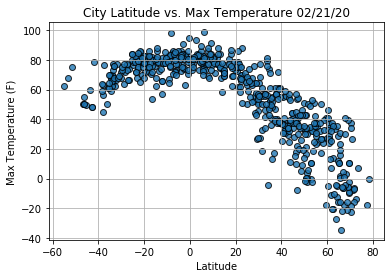

In [16]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

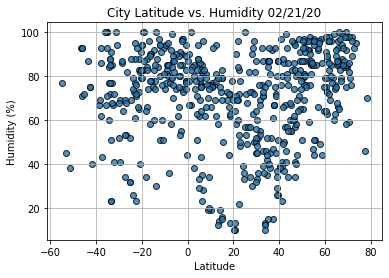

In [17]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

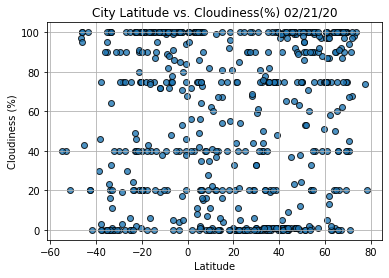

In [18]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

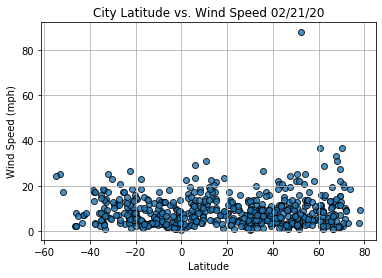

In [19]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [82]:
#Import linear regression from the Scipy stats module.
from scipy.stats import linregress

In [60]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [50]:
index13 = city_data_df.loc[13]
index13

City                         Poum
Country                        NC
Date          2020-02-21 19:52:25
Lat                        -20.23
Lng                        164.02
Max Temp                    80.56
Humidity                       79
Cloudiness                      1
Wind Speed                  15.82
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
574     True
575     True
576     True
577    False
578     True
Name: Lat, Length: 579, dtype: bool

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Wencheng,CN,2020-02-21 19:52:23,33.06,113.80,41.52,46,0,3.11
3,Aklavik,CA,2020-02-21 19:52:23,68.22,-135.01,3.20,84,90,11.41
4,Kapaa,US,2020-02-21 19:52:24,22.08,-159.32,75.20,69,40,4.70
5,Port Blair,IN,2020-02-21 19:52:24,11.67,92.75,81.43,76,0,16.15
8,Kodiak,US,2020-02-21 19:52:24,57.79,-152.41,26.60,49,75,21.92


In [61]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

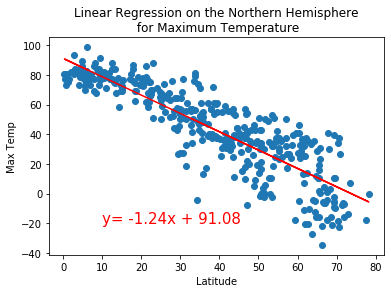

The r-value is -0.869


In [62]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))


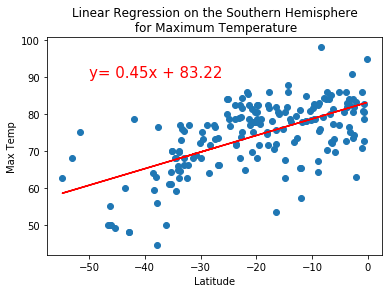

The r-value is 0.611


In [63]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

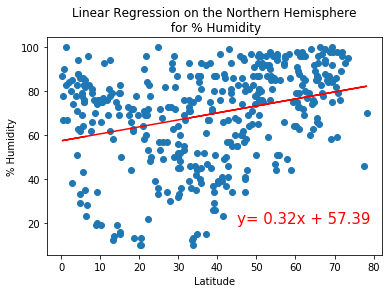

The r-value is 0.298


In [68]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))


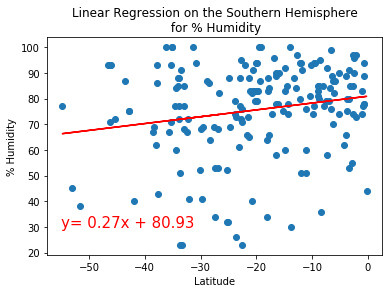

The r-value is 0.191


In [71]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Humidity", "% Humidity", (-55,30))

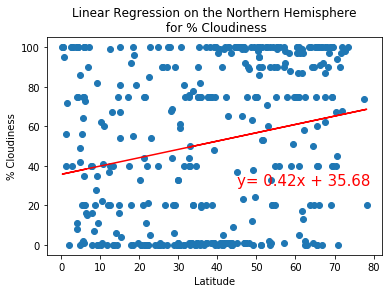

The r-value is 0.217


In [73]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (45,30))


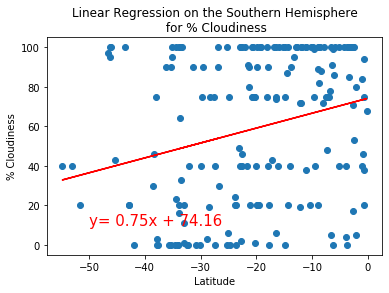

The r-value is 0.256


In [76]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Cloudiness", "% Cloudiness", (-50,10))

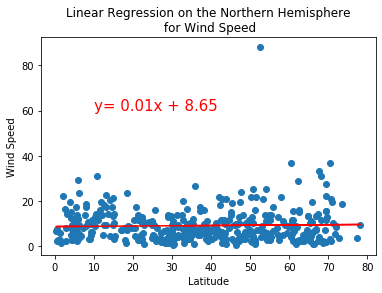

The r-value is 0.032


In [78]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Wind Speed", "Wind Speed", (10,60))


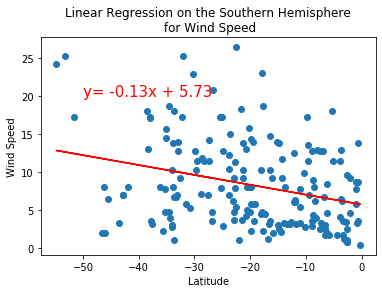

The r-value is -0.292


In [83]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed", (-50,20))